# Covid19 Data Analysis
------------------------------------------

### Data Preparation 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [7]:
df = pd.read_csv('C:/Users/Carla/Desktop/Projects/Covid/Covid19_Confirmed_dataset.csv') 
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
df.shape

(266, 104)

In [8]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [9]:
# Removal of columns that will not be used in analysis
df.drop(['Lat', 'Long'],axis=1,inplace=True)
df.columns

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=102)

### Analysis by country

In [11]:
dfregion = df.groupby('Country/Region').sum()

In [12]:
dfregion.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [13]:
dfregion.shape

(187, 100)

### Analysis of Portugal vs Spain

In [14]:
dfregion.loc['Spain']

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
4/26/20    207634
4/27/20    209465
4/28/20    210773
4/29/20    212917
4/30/20    213435
Name: Spain, Length: 100, dtype: int64

In [15]:
dfregion.loc['Portugal']

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    23864
4/27/20    24027
4/28/20    24322
4/29/20    24505
4/30/20    25045
Name: Portugal, Length: 100, dtype: int64

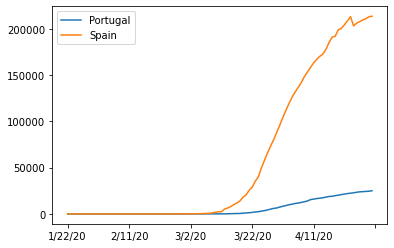

In [16]:
# Visualization side by side of number of cases across time
dfregion.loc['Portugal'].plot()
dfregion.loc['Spain'].plot()
plt.legend()

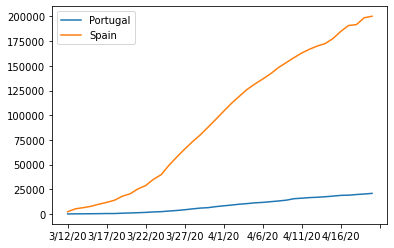

In [17]:
# Visualization from point in time where cases increase significantly
dfregion.loc['Portugal'][50:90].plot()
dfregion.loc['Spain'][50:90].plot()
plt.legend()

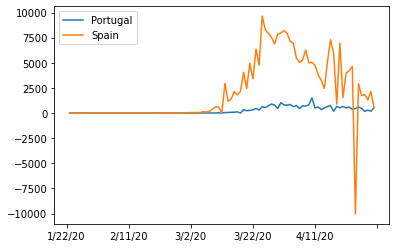

In [25]:
# Caculating the first derivative of the curve
dfregion.loc['Portugal'].diff().plot()
dfregion.loc['Spain'].diff().plot()
plt.legend()

### Maximum of infection rate

In [28]:
# View of specific country maximum infection
dfregion.loc['Spain'].diff().max()

9630.0

In [29]:
dfregion.loc['Portugal'].diff().max()

1516.0

In [19]:
# Creation of column with all posible maximum rates of all countries
country = list(dfregion.index)
maxrate = []
for x in country:
    maxrate.append(dfregion.loc[x].diff().max()) #For each region I look at the max difference of cases and append to the new list
dfregion['Max_Infection_Rate'] = maxrate

In [32]:
dfregion.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [20]:
# Creation of df with only the maximum rate per country
newdf = pd.DataFrame(dfregion['Max_Infection_Rate'])

In [21]:
newdf.head()

,Max_Infection_Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


<AxesSubplot:xlabel='Country/Region'>

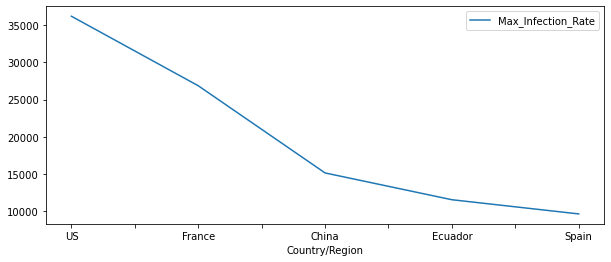

In [28]:
# Visualization of Top 5 countries with highest number of cases
newdf.sort_values(by='Max_Infection_Rate', ascending=False, inplace=True)
newdftop = newdf.head(5)
newdftop.plot(figsize=(10,4))

### Importing the second dataset - happiness report

In [29]:
happy = pd.read_csv("C:/Users/Carla/Desktop/Projects/Covid/worldwide_happiness_report.csv")

In [30]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [31]:
# Removal of columns not used for analysis
dropsubset = ['Overall rank','Score','Generosity','Perceptions of corruption']
happy.drop(dropsubset,axis=1,inplace=True)
happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [32]:
#Reset of the index to match the previous data set
happy.set_index('Country or region',inplace=True)
happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Integration of the Hapiness data with Max Covid infection rate

In [33]:
data=newdf.join(happy,how='inner')
data.head()

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
France,26849.0,1.324,1.472,1.045,0.436
China,15136.0,1.029,1.125,0.893,0.521
Ecuador,11536.0,0.912,1.312,0.868,0.498
Spain,9630.0,1.286,1.484,1.062,0.362
United Kingdom,8733.0,1.333,1.538,0.996,0.450


In [34]:
# Correlation matrix 
data.corr() #correlation between 2 columns, the closer to 1 the more related they are

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

#### Plotting GDP vs maximum Infection rate

In [42]:
# change of Max infection rate to log to allow visualization
data['Max_Infection_Rate'] = np.log(data['Max_Infection_Rate'])

<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_Rate'>

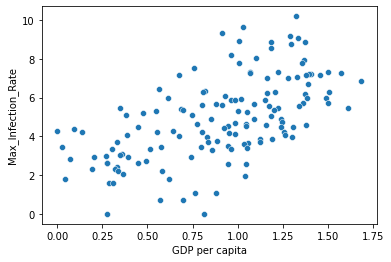

In [43]:
sns.scatterplot(data=data, x='GDP per capita', y='Max_Infection_Rate')

<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_Rate'>

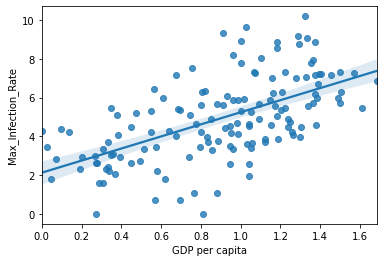

In [44]:
sns.regplot(data=data, x='GDP per capita', y='Max_Infection_Rate')

#### Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_Rate'>

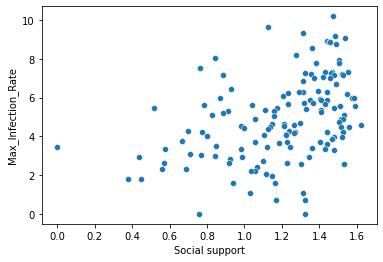

In [45]:
sns.scatterplot(data=data, x='Social support', y='Max_Infection_Rate')

<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_Rate'>

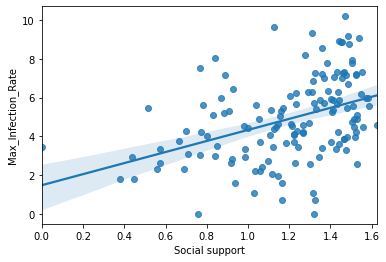

In [46]:
sns.regplot(data=data, x='Social support', y='Max_Infection_Rate')

#### Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_Infection_Rate'>

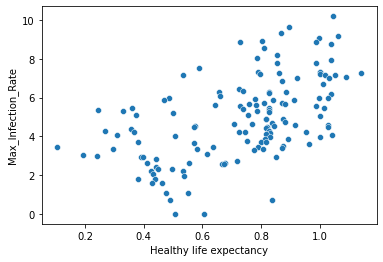

In [47]:
sns.scatterplot(data=data, x='Healthy life expectancy', y='Max_Infection_Rate')

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_Infection_Rate'>

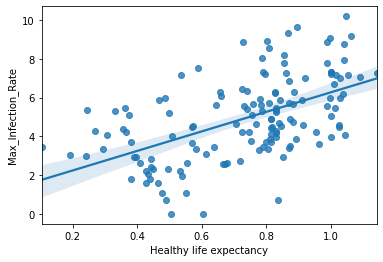

In [48]:
sns.regplot(data=data, x='Healthy life expectancy', y='Max_Infection_Rate')

#### Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_Infection_Rate'>

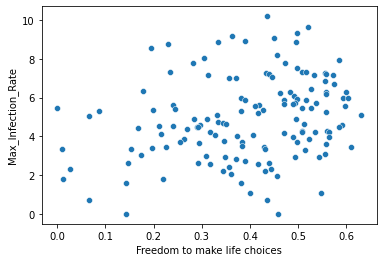

In [49]:
sns.scatterplot(data=data, x='Freedom to make life choices', y='Max_Infection_Rate')

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_Infection_Rate'>

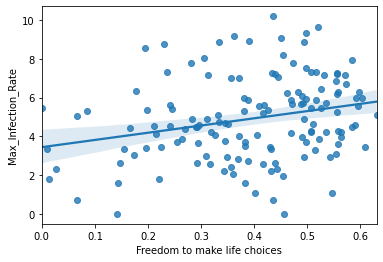

In [50]:
sns.regplot(data=data, x='Freedom to make life choices', y='Max_Infection_Rate')